# Vision models - model training using transfer learning



## Python imports

In [8]:
import matplotlib.pyplot as pyplt
import matplotlib.ticker
import os
import numpy as np
import pandas as pd
import time
import TFLite

## Read test data sets

In [9]:
DATASET_IDS = ['TS', 'PW', 'RW']
MODELS = [ 
    'GAutoML',
    'InceptionV1', 
    'InceptionV2', 
    'MobileNetV1', 
    'MobileNetV2', 
    'MobileNetV3', 
    'NasNetMobile', 
    'ResNetV1', 
    'ResNetV2'
]


DATASETS = {
    id : pd.read_csv('datasets/vision/'+id+'.tsv', sep='\t') for id in DATASET_IDS
}

In [11]:
results = []
for m in MODELS:
    model = TFLite.Model('models/vision/' + m)
    print('===>', m)
    plot_results = [m]
    for d,ds in DATASETS.items():
        results_file = 'results/vision/' + m + '_' + d + '.tsv'
        if os.path.exists(results_file):
            df = pd.read_csv(results_file, sep='\t')
        else: 
            df_items = []
            print('Evaluating model', m, 'over dataset', d)
            for item in ds.itertuples():
                pred = model.predict(item.image)
                top_pred_label = model.labels[np.array(pred).argsort()[::-1][0]]
                r = [item.label, item.set, item.time, item.source, item.image, item.video, top_pred_label]
                for x in sorted(zip(model.labels, pred), key=lambda x: x[0]):
                    r.append(x[1])
                #print(r)
                df_items.append(r)
            df = pd.DataFrame(df_items, columns=['label', 'set', 'time', 'source', 'image', 'video', 'prediction'] + sorted(model.labels))
            df.to_csv(results_file, sep='\t', index=False)
            #print(df)
        df['correct'] = (df['label'] == df['prediction']).astype(float)
        score = df['correct'].mean()
        plot_results.append(score)
        print(d, score)
    results.append(plot_results)
print(results)
plot_data = pd.DataFrame(results, columns=['Model'] + DATASET_IDS)
plot_data

===> GAutoML
TS 0.973432518597237
PW 0.7941176470588235
RW 0.8163265306122449
===> InceptionV1
TS 0.8703506907545164
PW 0.6336898395721925
RW 0.7625231910946196
===> InceptionV2
TS 0.8597236981934112
PW 0.6016042780748663
RW 0.738404452690167
===> MobileNetV1
TS 0.9054197662061636
PW 0.6470588235294118
RW 0.7792207792207793
===> MobileNetV2
TS 0.8618490967056323
PW 0.5668449197860963
RW 0.7068645640074211
===> MobileNetV3
TS 0.8767268862911796
PW 0.6737967914438503
RW 0.764378478664193
===> NasNetMobile
TS 0.8289054197662061
PW 0.6016042780748663
RW 0.7068645640074211
===> ResNetV1
TS 0.9181721572794899
PW 0.6657754010695187
RW 0.7532467532467533
===> ResNetV2
TS 0.8799149840595112
PW 0.6577540106951871
Evaluating model ResNetV2 over dataset RW
RW 0.7755102040816326
[['GAutoML', 0.973432518597237, 0.7941176470588235, 0.8163265306122449], ['InceptionV1', 0.8703506907545164, 0.6336898395721925, 0.7625231910946196], ['InceptionV2', 0.8597236981934112, 0.6016042780748663, 0.738404452690167

,Model,TS,PW,RW
0,GAutoML,0.973433,0.794118,0.816327
1,InceptionV1,0.870351,0.633690,0.762523
2,InceptionV2,0.859724,0.601604,0.738404
3,MobileNetV1,0.905420,0.647059,0.779221
4,MobileNetV2,0.861849,0.566845,0.706865
5,MobileNetV3,0.876727,0.673797,0.764378
6,NasNetMobile,0.828905,0.601604,0.706865
7,ResNetV1,0.918172,0.665775,0.753247
8,ResNetV2,0.879915,0.657754,0.775510


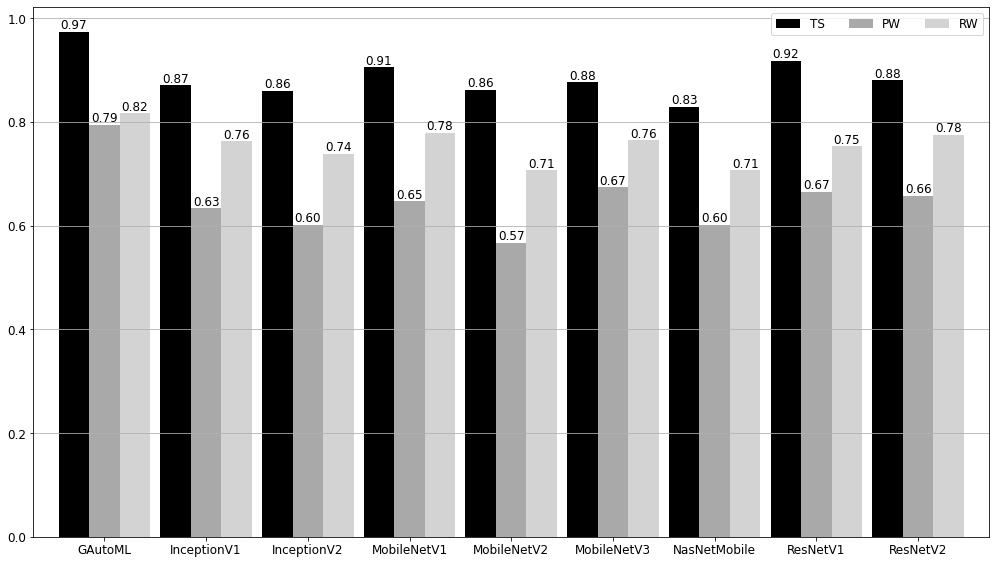

In [12]:
font = {'family' : 'normal',
        'size'   : 12}
pyplt.rc('font', **font)
pyplt.rcParams["figure.figsize"] = (14,8)

plt = plot_data.plot.bar(x='Model',y=DATASET_IDS,color=['black','darkgray','lightgray'],width=0.9)
plt.legend(loc='upper right',ncol=3)
#plt.set_ylim([0.3,1.0])
plt.set_xlabel('')
plt.grid(axis='y')
plt.set_xticklabels(MODELS, rotation=0, ha='center')

for container in plt.containers:
  plt.bar_label(container,fmt='%.2f')
plt.get_figure().tight_layout()
plt.get_figure().savefig('vision_model_results.pdf')